## Dive into Deep Learning

### Train a deep learning model to classify beetles, cockroaches and dragonflies using these images. Note: Original images from https://www.insectimages.org/index.cfm. Blog about this, and explain how the neural network classified the images using SHapley Additive exPlanations.

### If DropBox does not work, you can use this wget https://people.duke.edu/~ccc14/insects.zip

### For this blog (project), we want to train a deep learning model to classify images of different insects (beetles, cockroaches, dragonflies)
### The neural network and its classification we used will be explained by Shapley Additive Explanations.

### We first import all the libraries we want to use for this project. 
### Out neural network is used under tensorflow/keras. 
### Other libraries we used include but not limited to: matplotlib, numpy, skimage etc.

In [65]:
%matplotlib inline
import tensorflow as tf
import matplotlib as plt
import numpy as np
import cv2
import os
import PIL
from PIL import Image
import glob
import skimage
from skimage import data
from matplotlib import pyplot as plt
%pylab inline
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import pickle

Populating the interactive namespace from numpy and matplotlib


In [66]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

### We first load one of the image that we want to train and check out how it looks like.

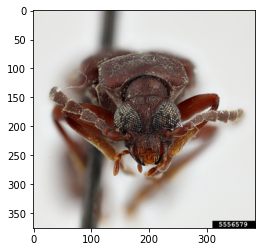

In [67]:
img=image.load_img("insects/train/beetles/5556579.jpg")
plt.imshow(img)
plt.show(img)

### Ok it appears...very interesting (disgusting). Let's try not to open anyone of them again......

In [68]:
#cv2.imread("insects/train/beetles/5556579.jpg")

### Let's see the shape of one example just to get an idea of its measures.

In [69]:
cv2.imread("insects/train/beetles/5556636.jpg").shape

(326, 384, 3)

### Cool, now we know how they look like and their shapes, let's prepare for our models.

In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Let's create a training data generator using ImageDataGenerator from tensorflow.keras.
### We want to do some pre-processing and adjust for our images, then we want to separate both a training set and a validation set (80%/20% split).

In [71]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                   validation_split=0.2) # set validation split


### Now let's open the training dataset from our directory and adjust its sizes.
### we also want to set the class_mode as categorical since we are not doing binary values.

In [72]:
train_dataset = train_datagen.flow_from_directory("insects/train",
                                                  #shuffle=True,
                                    
                                    target_size= (200,200),
                                    batch_size = 3,
                                    class_mode = 'categorical',
                                    subset='training')

Found 816 images belonging to 3 classes.


### Looks like we have 816 images with 3 classes. That's exactly what we want. Now let's keep going...

### Same steps with the validation dataset.

In [73]:
validation_dataset = train_datagen.flow_from_directory("insects/train",
                                                       #shuffle=True,
                                    
                                    target_size= (200,200),
                                    batch_size = 3,
                                    class_mode = 'categorical',
                                    subset='validation'

)

Found 203 images belonging to 3 classes.


### 203 images with also 3 classes, great!

### Now, let's declare out testing data generator! Same steps as above...

In [74]:
test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator = test_datagen.flow_from_directory("insects/train",#shuffle=True,
                                                 target_size=(200,200),
                                                 class_mode='categorical',
                                                 batch_size=3)

Found 1019 images belonging to 3 classes.


### Good, we now have 1019 images with also 3 classes in out testing set.

### Let's see what these 3 classes are:

In [75]:
train_dataset.class_indices

{'beetles': 0, 'cockroach': 1, 'dragonflies': 2}

In [76]:
validation_dataset.class_indices

{'beetles': 0, 'cockroach': 1, 'dragonflies': 2}

In [77]:
#train_dataset.classes

In [78]:
#validation_dataset.classes

### Cool, looks like our 3 classes are: beetles as 0, cockroach as 1, and dragonflies as 2!

### Let's do something for our model! For this model, we used a neural network that has a convolution 2D neural net structure. 

### How do we build it? 
### We declare different layers sequentially so that every layer has its shape and dimensions. We then dense and flatten the layers. 

In [79]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(3,activation='softmax')
                                   ])

### We also want to minimized our loss function which is categorical_crossentropy in this case.

In [81]:
model.compile(loss='categorical_crossentropy',
               optimizer = RMSprop(lr=0.001),
               metrics=['accuracy']
              )

### Looks like everything is set now, let's start fitting our model!

In [87]:
history=model.fit(train_dataset,
                      steps_per_epoch = 5,
                      batch_size = 1,
                      epochs = 30,
                      validation_data = validation_dataset
                   )

Epoch 1/30
5/5 [==============================] - 5s 1s/step - loss: 1.1644 - accuracy: 0.6000 - val_loss: 2.6884 - val_accuracy: 0.3941
Epoch 2/30
5/5 [==============================] - 5s 1s/step - loss: 0.8894 - accuracy: 0.6000 - val_loss: 2.4192 - val_accuracy: 0.4138
Epoch 3/30
5/5 [==============================] - 5s 1s/step - loss: 1.4179 - accuracy: 0.4000 - val_loss: 2.8435 - val_accuracy: 0.3251
Epoch 4/30
5/5 [==============================] - 5s 1s/step - loss: 0.9131 - accuracy: 0.6667 - val_loss: 1.4584 - val_accuracy: 0.5419
Epoch 5/30
5/5 [==============================] - 5s 1s/step - loss: 0.8746 - accuracy: 0.7333 - val_loss: 1.9552 - val_accuracy: 0.3793
Epoch 6/30
5/5 [==============================] - 5s 1s/step - loss: 0.5609 - accuracy: 0.8000 - val_loss: 2.2928 - val_accuracy: 0.3202
Epoch 7/30
5/5 [==============================] - 5s 1s/step - loss: 1.0883 - accuracy: 0.7333 - val_loss: 1.9884 - val_accuracy: 0.3596
Epoch 8/30
5/5 [=========================

### Done! Luckily, even if my laptop was heating up and screaming, it didn't die after this. 
### Let's see how our training loss and validation loss look like in the model:

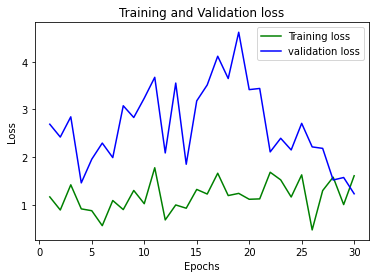

In [88]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Honestly I think that looks okay, could be much better though but I don't want to keep torturing my laptop.
### How do my training accuracy and validation accuracy look like?

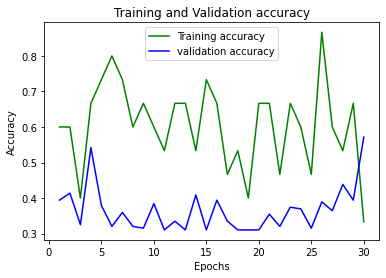

In [89]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Ok...Let's see some summaries of our model:

In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 198, 198, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 97, 97, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 64)       

### Cool. Now let's test our model and see how it reacts to the testing data. Let's try testing the beetles:

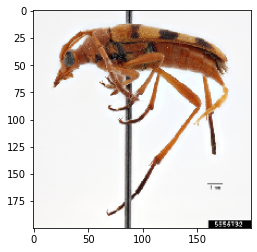

It is a beetle


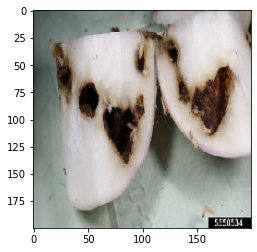

It is a beetle


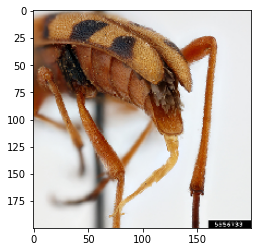

It is a beetle


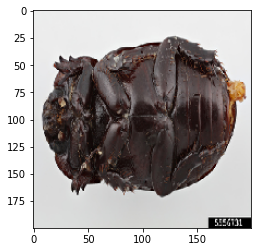

It is a beetle


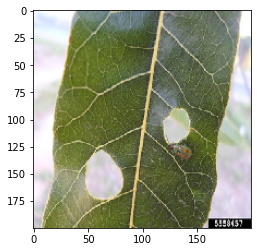

It is a beetle


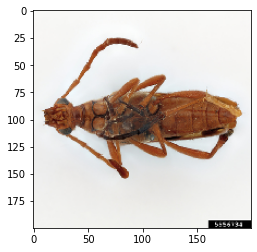

It is a beetle


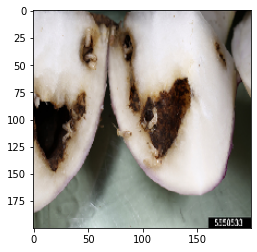

It is a beetle


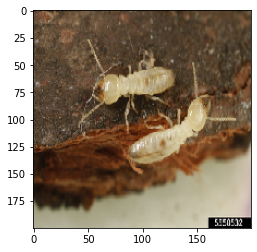

It is a beetle


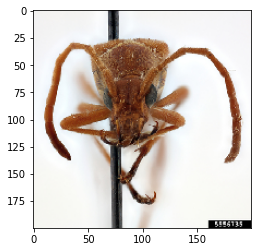

It is a beetle


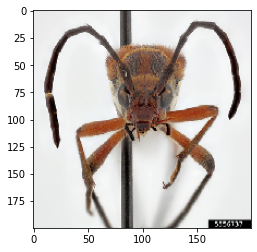

It is a beetle


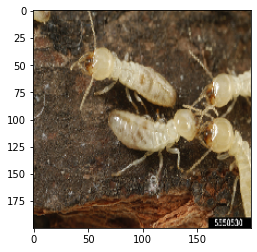

It is a beetle


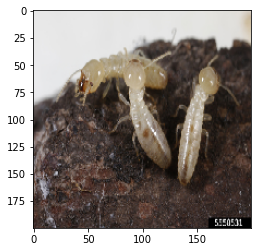

It is a beetle


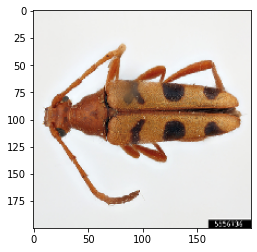

It is a beetle


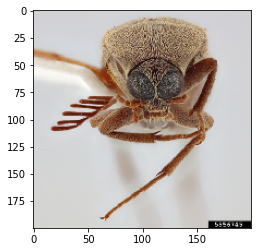

It is a beetle


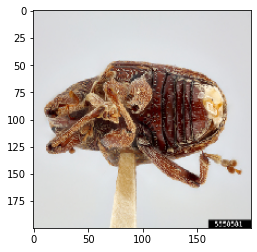

It is a beetle


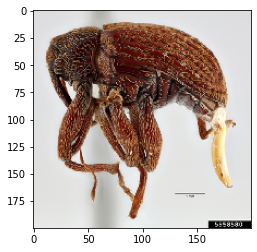

It is a beetle


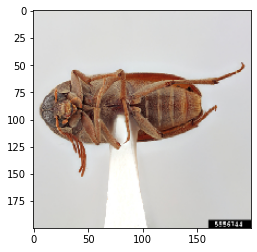

It is a beetle


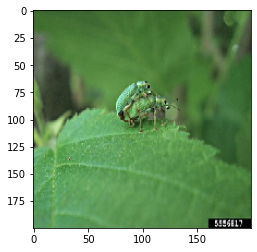

It is a beetle


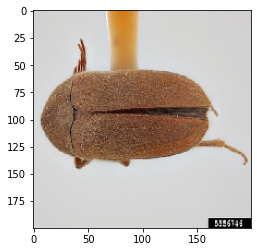

It is a beetle


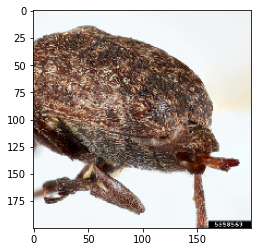

It is a beetle


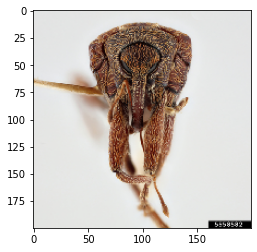

It is a beetle


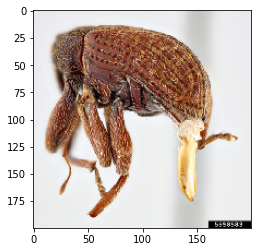

It is a beetle


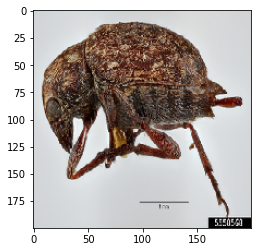

It is a beetle


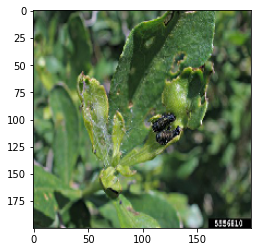

It is a beetle


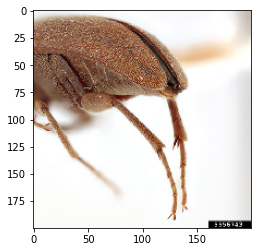

It is a beetle


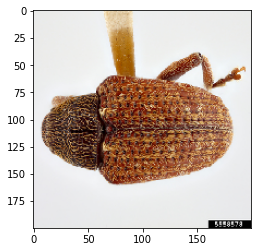

It is a beetle


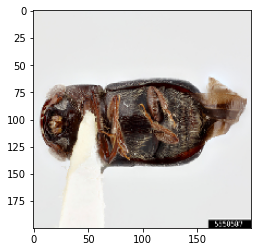

It is a beetle


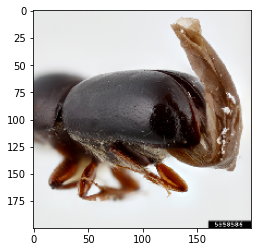

It is a beetle


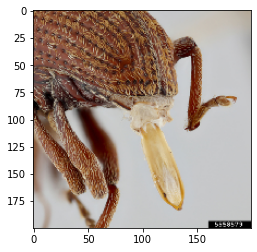

It is a beetle


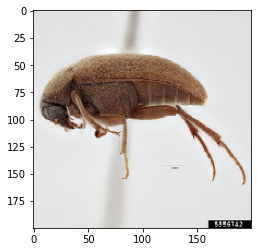

It is a beetle


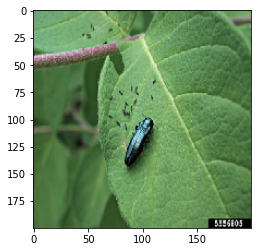

It is a beetle


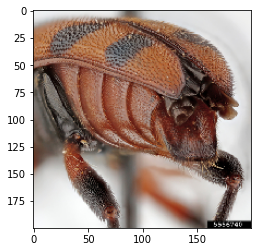

It is a beetle


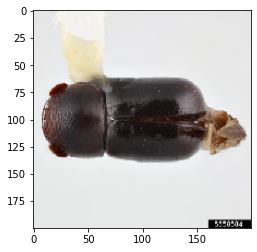

It is a beetle


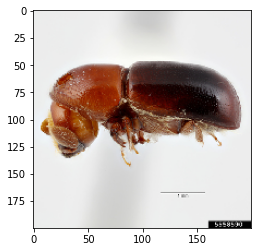

It is a beetle


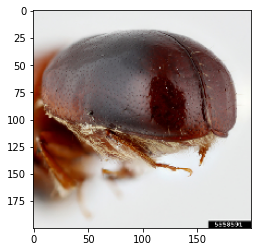

It is a beetle


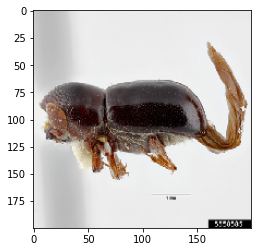

It is a beetle


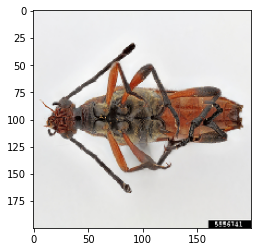

It is a beetle


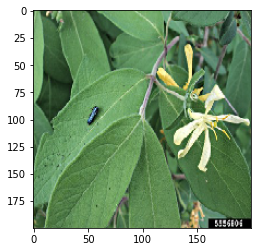

It is a beetle


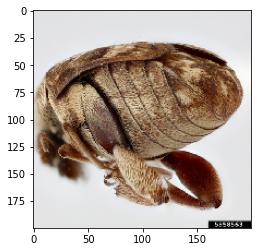

It is a beetle


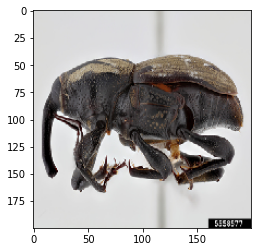

It is a beetle


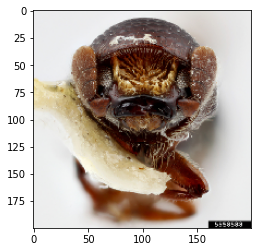

It is a beetle


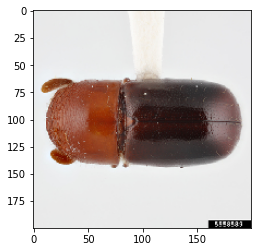

It is a beetle


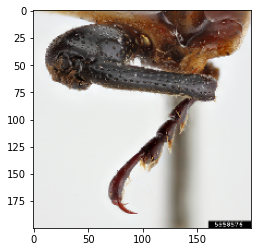

It is a beetle


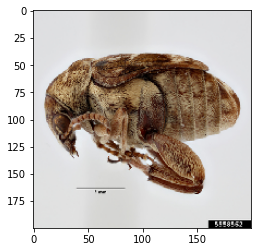

It is a beetle


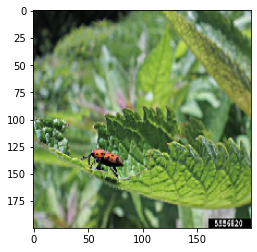

It is a beetle


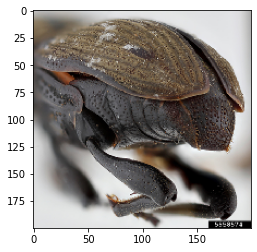

It is a beetle


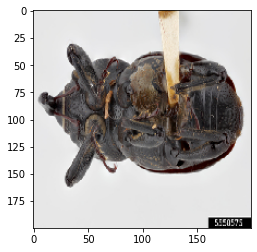

It is a beetle


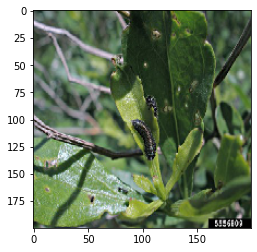

It is a beetle


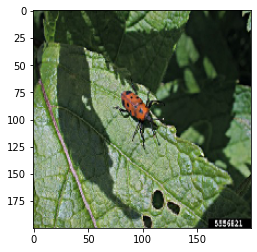

It is a beetle


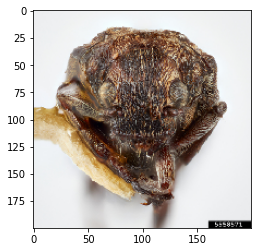

It is a beetle


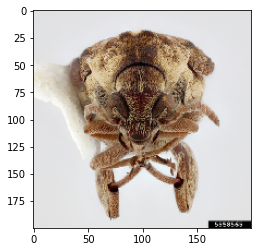

It is a beetle


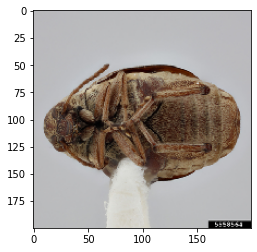

It is a beetle


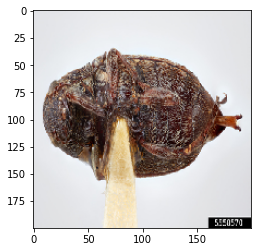

It is a beetle


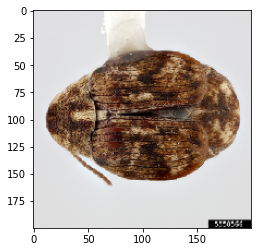

It is a beetle


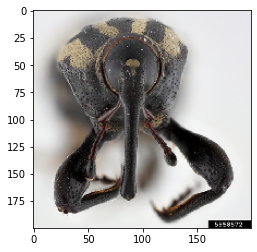

It is a beetle


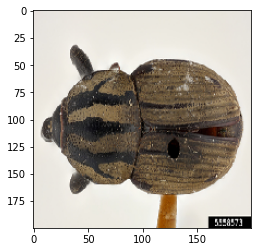

It is a beetle


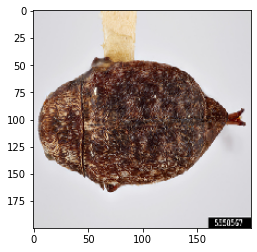

It is a beetle


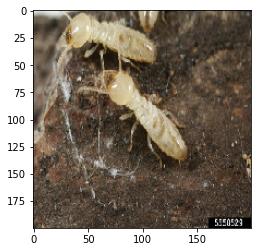

It is a beetle


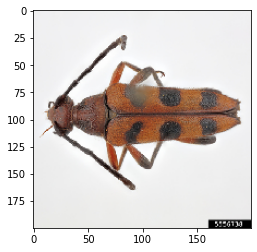

It is a beetle


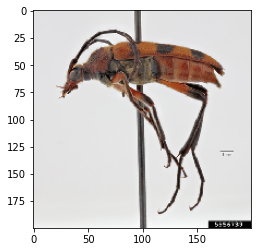

It is a beetle


In [95]:
dir_path = 'insects/test/beetles'

for i in os.listdir(dir_path):
    img= image.load_img(dir_path+'/'+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X= np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val=model.predict(images)
    if (val==0).any():
        print("It is a beetle")
    else:
        print("Not a beetle")

### Good job! Our model detected all the beetles from our testing set. They look just as interesting (disgusting) as the one we've seen not long ago. 

## Shapley Explanations:
### We then explain how the neural network classified the images using shap(gradient explainer)
### Converting datasets into numpy arrays:

In [94]:
x_train=np.concatenate([train_dataset.next()[0] for i in range(train_dataset.__len__())])
y_train=np.concatenate([train_dataset.next()[1] for i in range(train_dataset.__len__())])
x_test=np.concatenate([test_generator.next()[0] for i in range(test_generator.__len__())])
y_test=np.concatenate([test_generator.next()[1] for i in range(test_generator.__len__())])
y_test = np.where(ytest == 0, "beetles", np.where(ytest == 1, "cockroach", "dragonflies"))

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


### Declare shap explainer:

In [96]:
explainer = shap.GradientExplainer(model, xtrain)
shap_vals = explainer.shap_values(xtest[:5])

### Let's see image plots from shap:

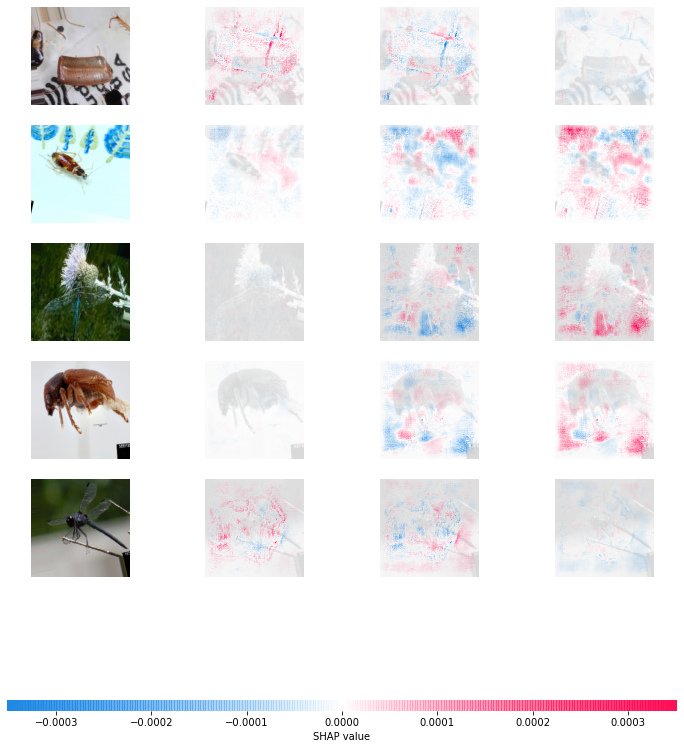

In [108]:
shap.image_plot([shap_vals[i] for i in range(3)], xtest[91:96]) 

#### ['beetles', 'cockroach','dragonflies', 'beetles','dragonflies']

# Thank you for watching!